# IF R^2 IS NEGATIVE, MEANS THAT ITS A WORSE FIT THAN A HORIZONTAL LINE

## Import stock price info
- create a difference in stock price table (just for most recent before for now)

In [20]:
import pandas as pd
prices = pd.read_csv(r'stockPrice.csv')
pricedif1 = {'price change(%)': ((prices.iloc[:, 2] - prices.iloc[:, 1])/prices.iloc[:, 1])*100}
pricedif1 = pd.DataFrame.from_dict(pricedif1)
pricedif1

,price change(%)
AAPL,6.977762
MSFT,2.849317
GOOG,7.367353
AMZN,13.535914
TSLA,3.231684
BRK-A,2.149706
FB,-26.390095
UNH,-0.138362
NVDA,-7.559117
JNJ,0.442428


# Revenue
- results are very different for each run through

In [25]:
rev = pd.read_csv(r'revenue.csv')
revdata = pd.DataFrame.from_dict(rev.iloc[:, 1]).join(pricedif1)
revdata.head(5)


,Most Recent Revenue,price change(%)
AAPL,1.239450e+11,6.977762
MSFT,5.172800e+10,2.849317
GOOG,7.532500e+10,7.367353
AMZN,1.374120e+11,13.535914
TSLA,1.771900e+10,3.231684


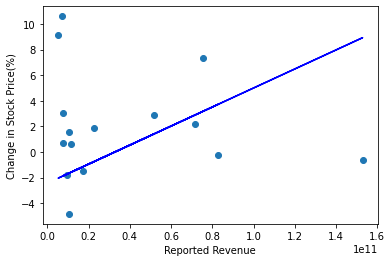

Coefficients: 
 [[7.42736108e-11]]
Mean squared error: 31.41
Coefficient of determination: -0.93


C:\Users\jexia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


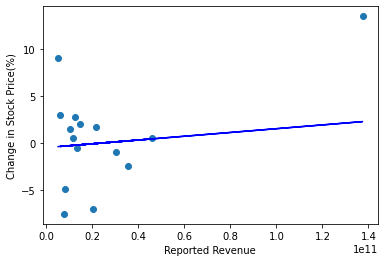

Coefficients: 
 [[2.01710289e-11]]
Mean squared error: 25.30
Coefficient of determination: 0.10


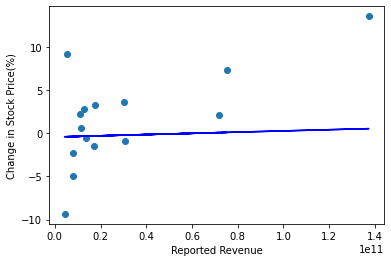

Coefficients: 
 [[7.0342732e-12]]
Mean squared error: 31.14
Coefficient of determination: -0.06


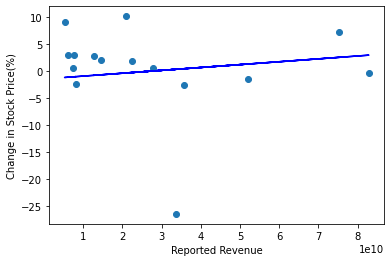

Coefficients: 
 [[5.32089835e-11]]
Mean squared error: 69.56
Coefficient of determination: -0.06


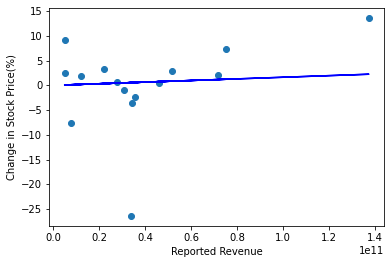

Coefficients: 
 [[1.6349127e-11]]
Mean squared error: 72.14
Coefficient of determination: 0.04


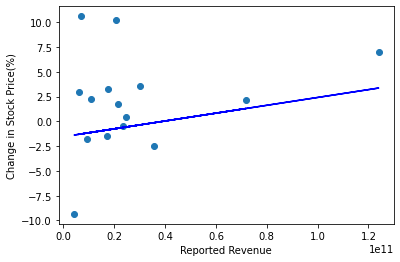

Coefficients: 
 [[3.95702695e-11]]
Mean squared error: 27.49
Coefficient of determination: -0.16


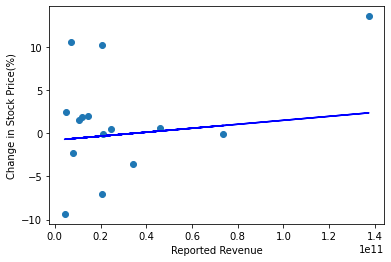

Coefficients: 
 [[2.29720943e-11]]
Mean squared error: 35.03
Coefficient of determination: 0.03


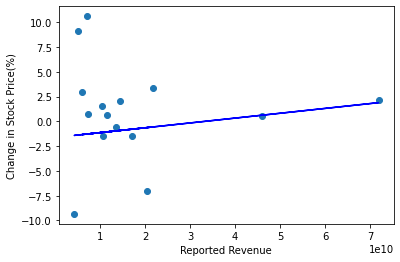

Coefficients: 
 [[4.8928607e-11]]
Mean squared error: 27.48
Coefficient of determination: -0.15


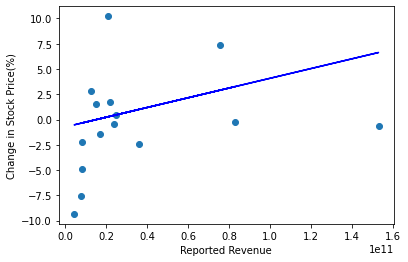

Coefficients: 
 [[4.81591602e-11]]
Mean squared error: 24.42
Coefficient of determination: -0.04


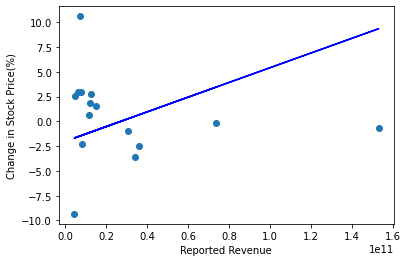

Coefficients: 
 [[7.42206556e-11]]
Mean squared error: 29.03
Coefficient of determination: -0.68
                         coef        mse        r2
0   [[7.427361076257549e-11]]  31.410799 -0.929510
1   [[2.017102887931128e-11]]  25.303753  0.101877
2   [[7.034273197021006e-12]]  31.140755 -0.063112
3   [[5.320898354581104e-11]]  69.557091 -0.063115
4  [[1.6349126991858194e-11]]  72.140257  0.040268
5   [[3.957026952273903e-11]]  27.487147 -0.164231
6   [[2.297209428184224e-11]]  35.030167  0.030872
7   [[4.892860701112446e-11]]  27.477749 -0.154822
8   [[4.815916020524433e-11]]  24.424633 -0.038433
9   [[7.422065560397235e-11]]  29.025424 -0.676915


In [64]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create dataframe to store coefficient, mean squared error, and r2
rev_results = pd.DataFrame.from_dict({"coef": [], "mse": [], "r2": []})

for x in range(10):
    # Create test and train sets
    rev_train, rev_test, price_train, price_test = train_test_split(revdata.iloc[:, 0], revdata.iloc[:, 1], test_size=0.3)

    # Reformat test and train sets
    rev_train = rev_train.to_frame()
    price_train = price_train.to_frame()
    rev_test = rev_test.to_frame()
    price_test = price_test.to_frame()

    # Create linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(rev_train, price_train)

    # Make predictions using the testing set
    price_pred = regr.predict(rev_test)

    # Create plot
    plt.scatter(rev_test, price_test)
    plt.plot(rev_test, price_pred, color = "blue")
    plt.xlabel("Reported Revenue")
    plt.ylabel("Change in Stock Price(%)")
    plt.show()


    # Print coefficients, mean squared error, and coefficient of determination (r^2)
    rev_results.loc[x] = [regr.coef_, mean_squared_error(price_test, price_pred), r2_score(price_test, price_pred)]
    print("Coefficients: \n", regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(price_test, price_pred))
    print("Coefficient of determination: %.2f" % r2_score(price_test, price_pred))
    
print(rev_results)

# Cost of Revenue

In [60]:
CoR = pd.read_csv(r'costOfRevenue.csv')
CoRdata = pd.DataFrame.from_dict(CoR.iloc[:, 1]).join(pricedif1)
CoRdata.head(5)

,Most Recent Cost of Revenue,price change(%)
AAPL,6.970200e+10,6.977762
MSFT,1.696000e+10,2.849317
GOOG,3.298800e+10,7.367353
AMZN,8.283500e+10,13.535914
TSLA,1.287200e+10,3.231684


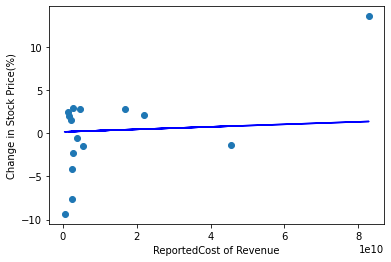

C:\Users\jexia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Coefficients: 
 [[1.45297512e-11]]
Mean squared error: 24.38
Coefficient of determination: 0.08


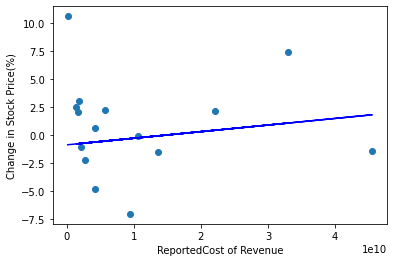

Coefficients: 
 [[5.89922126e-11]]
Mean squared error: 19.61
Coefficient of determination: -0.09


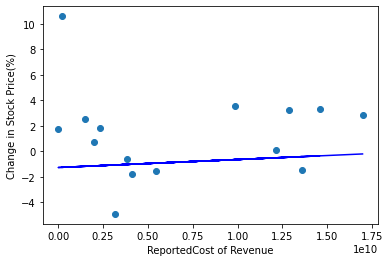

Coefficients: 
 [[6.27919304e-11]]
Mean squared error: 16.52
Coefficient of determination: -0.43


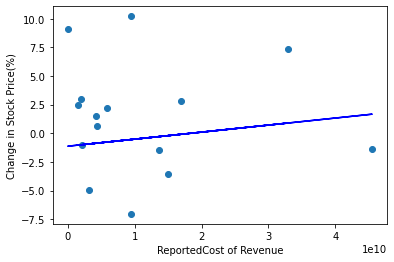

Coefficients: 
 [[6.14428654e-11]]
Mean squared error: 26.48
Coefficient of determination: -0.17


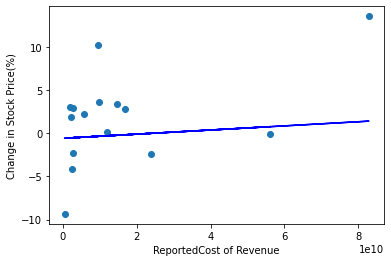

Coefficients: 
 [[2.39644971e-11]]
Mean squared error: 28.92
Coefficient of determination: -0.04


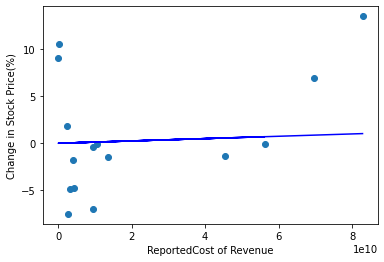

Coefficients: 
 [[1.24640071e-11]]
Mean squared error: 37.42
Coefficient of determination: 0.04


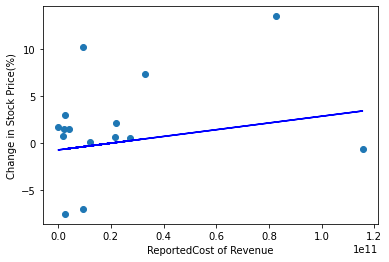

Coefficients: 
 [[3.59530925e-11]]
Mean squared error: 28.77
Coefficient of determination: -0.03


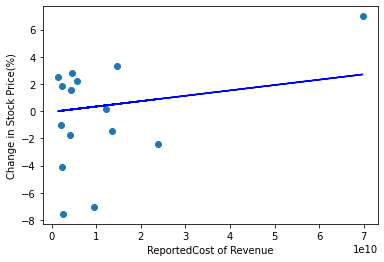

Coefficients: 
 [[3.94897351e-11]]
Mean squared error: 13.23
Coefficient of determination: 0.10


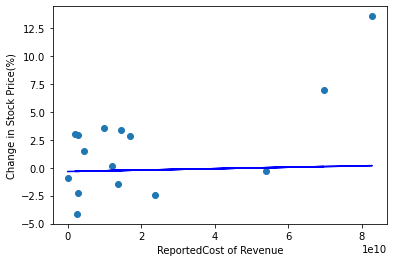

Coefficients: 
 [[6.32676876e-12]]
Mean squared error: 20.89
Coefficient of determination: -0.17


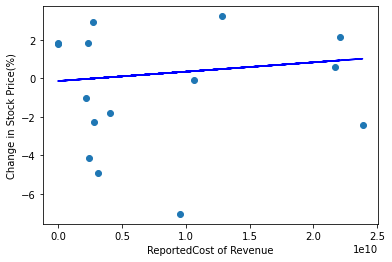

Coefficients: 
 [[4.85528532e-11]]
Mean squared error: 9.75
Coefficient of determination: -0.09
                         coef        mse        r2
0  [[1.4529751194274567e-11]]  24.382685  0.075432
1    [[5.89922125527476e-11]]  19.608676 -0.092736
2    [[6.27919303553591e-11]]  16.524122 -0.434052
3   [[6.144286537148861e-11]]  26.483449 -0.174976
4  [[2.3964497071598843e-11]]  28.915652 -0.036992
5  [[1.2464007086529966e-11]]  37.416314  0.036446
6  [[3.5953092450994707e-11]]  28.769561 -0.027795
7  [[3.9489735123158895e-11]]  13.226511  0.097429
8   [[6.326768760525116e-12]]  20.893023 -0.165832
9  [[4.8552853195214775e-11]]   9.745542 -0.086370


In [65]:
# Create dataframe to store coefficient, mean squared error, and r2
CoR_results = pd.DataFrame.from_dict({"coef": [], "mse": [], "r2": []})

for x in range(10):
    # Create test and train sets
    CoR_train, CoR_test, price_train, price_test = train_test_split(CoRdata.iloc[:, 0], CoRdata.iloc[:, 1], test_size=0.3)

    # Reformat test and train sets
    CoR_train = CoR_train.to_frame()
    price_train = price_train.to_frame()
    CoR_test = CoR_test.to_frame()
    price_test = price_test.to_frame()

    # Create linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(CoR_train, price_train)

    # Make predictions using the testing set
    price_pred = regr.predict(CoR_test)

    # Create plot
    plt.scatter(CoR_test, price_test)
    plt.plot(CoR_test, price_pred, color = "blue")
    plt.xlabel("ReportedCost of Revenue")
    plt.ylabel("Change in Stock Price(%)")
    plt.show()


    # Print coefficients, mean squared error, and coefficient of determination (r^2)
    CoR_results.loc[x] = [regr.coef_, mean_squared_error(price_test, price_pred), r2_score(price_test, price_pred)]
    print("Coefficients: \n", regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(price_test, price_pred))
    print("Coefficient of determination: %.2f" % r2_score(price_test, price_pred))
    
print(CoR_results)